# Telecom Churn Prediction

Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


About the Dataset
The telecoms churn dataset contains information about customers of a telecom company and whether they churned (cancelled their service) or not.

About Feature,
1.  customerID: Customer ID
2.  gender: Whether the customer is a male or a female
3.  Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
4.  Partner: Whether the customer has a partner or not (Yes, No)
5.  Dependents: Whether the customer has dependents or not (Yes, No)
6. tenure: Number of months the customer has stayed with the company
7.  Phone Service: Whether the customer has a phone service or not (Yes, No)
8.  Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9.  Internet Service: Customer’s internet service provider (DSL, Fiber optic, No)
11. Online Security: Whether the customer has online security or not (Yes, No, No internet service)
12. Online Backup: Whether the customer has online backup or not (Yes, No, No internet service)
14. Device Protection: Whether the customer has device protection or not (Yes, No, No internet service)
15. Tech Support: Whether the customer has tech support or not (Yes, No, No internet service)
16. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
17. Streaming: Whether the customer has streaming movies or not (Yes, No, No internet service)
18.  Contract: The contract term of the customer (Month-to-month, One year, Two year)
19. Paperless Billing: Whether the customer has paperless billing or not (Yes, No)
20. Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
21. Monthly Charges: The amount charged to the customer monthly
22. Total Charges: The total amount charged to the customer
23. Churn Label: Whether the customer churned or not (Yes or No)

# Loading libraries and data

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
dataset=pd.read_csv('C:\\Users\\Admin\\Desktop\\bia\\ML bia\\capstone project\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exploratory data analysis (EDA)

In [4]:
#to display the first 5 rows of a Dataset
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset.shape #dimension of dataframe

(7043, 21)

In [6]:
#no. of unique values per column / attribute
col_name= dataset.columns
for i in col_name:
  print(i, 'has:', dataset[i].nunique(),"Unique Values")

customerID has: 7043 Unique Values
gender has: 2 Unique Values
SeniorCitizen has: 2 Unique Values
Partner has: 2 Unique Values
Dependents has: 2 Unique Values
tenure has: 73 Unique Values
PhoneService has: 2 Unique Values
MultipleLines has: 3 Unique Values
InternetService has: 3 Unique Values
OnlineSecurity has: 3 Unique Values
OnlineBackup has: 3 Unique Values
DeviceProtection has: 3 Unique Values
TechSupport has: 3 Unique Values
StreamingTV has: 3 Unique Values
StreamingMovies has: 3 Unique Values
Contract has: 3 Unique Values
PaperlessBilling has: 2 Unique Values
PaymentMethod has: 4 Unique Values
MonthlyCharges has: 1585 Unique Values
TotalCharges has: 6531 Unique Values
Churn has: 2 Unique Values


In [7]:
# info() method in pandas provides a concise summary of the DataFrame's structure and content
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


we need to change 'TotalCharges' column to a numeric data type

In [8]:
#to check the descriptive statistics of numeric variables
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


From above output can say that,

1.   'SeniorCitizen' column is categorical, because 25%-50%-75% shows 0
2.   75% of customers have tenure of 55 months
3.   75% of customers pay 89.85 CAD whereas the average mean is 64.7 CAD  (CAD=Canadian dollar)




In [9]:
#To create a copy of DataFrame for manipulation and processing
df = dataset.copy()

In [10]:
# Data Cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df['TotalCharges'].dtype

dtype('float64')

In [12]:
#to count the number of missing (null or NaN) values in each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 values missing in 'TotalCharges' column

In [13]:
missing_total_charges = df[df['TotalCharges'].isnull()]
churn_values_for_missing_total_charges = missing_total_charges['Churn']
churn_values_for_missing_total_charges

488     No
753     No
936     No
1082    No
1340    No
3331    No
3826    No
4380    No
5218    No
6670    No
6754    No
Name: Churn, dtype: object

The above code shows whether the 'Churn' values are 'Yes' or 'No' for the rows with missing values in the 'TotalCharges' column. We can see that there only non-churners.

In [14]:
total_customers = 7043
missing_values_count = 11

percentage_missing_values = (missing_values_count / total_customers) * 100
print(f"Percentage of customers with missing values: {percentage_missing_values:.2f}%")

Percentage of customers with missing values: 0.16%


since percentage of customers with missing values is 0.16 deleting them will not affect the data.

In [15]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [16]:
df.shape

(7032, 21)

In [17]:
#count of 'Yes' and 'No' values in the 'Churn' column
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [18]:
#the percentage of 'Yes' and 'No' values in the 'Churn' column
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

Data is highly imbalanced

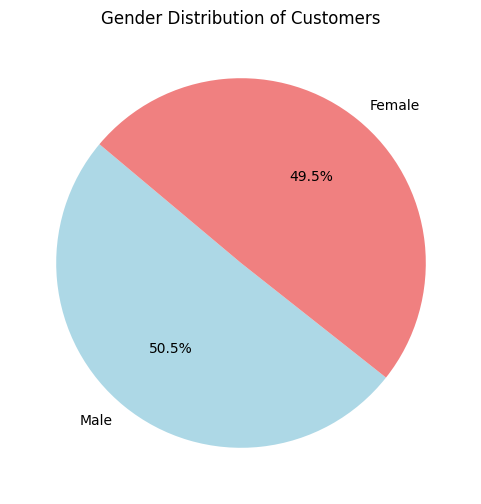

In [19]:
gender_counts = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')

# Show the pie chart
plt.show()


It appears that the gender distribution in dataset is roughly balanced, with approximately 49.5% female and 50.5% male customers. This balance is important to consider when analyzing the dataset, as it ensures that gender-related insights are not biased toward one gender

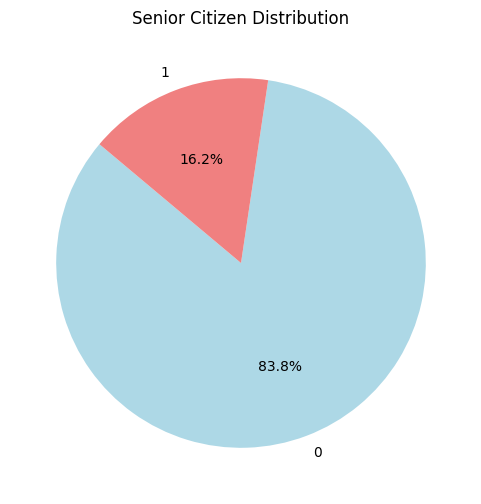

In [20]:

# Calculate the Senior Citizen distribution
senior_counts = df['SeniorCitizen'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(senior_counts, labels=senior_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Senior Citizen Distribution')

# Show the pie chart
plt.show()


Most of the customers are young

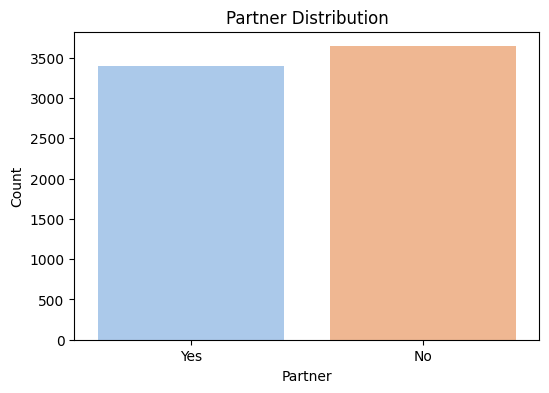

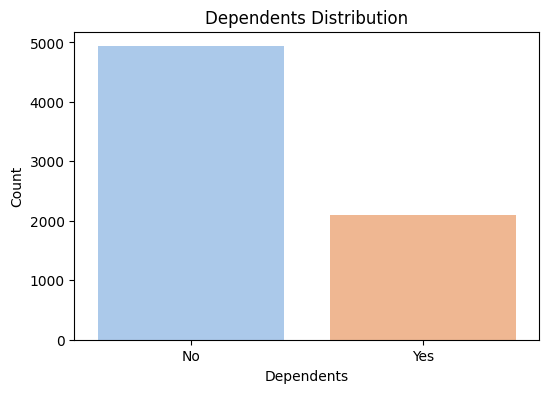

In [21]:
# Create a count plot for 'Partner' distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Partner', palette='pastel')
plt.title('Partner Distribution')
plt.xlabel('Partner')
plt.ylabel('Count')

# Show the plot
plt.show()

# Create a count plot for 'Dependents' distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents', palette='pastel')
plt.title('Dependents Distribution')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Show the plot
plt.show()

there are more customers with no dependents

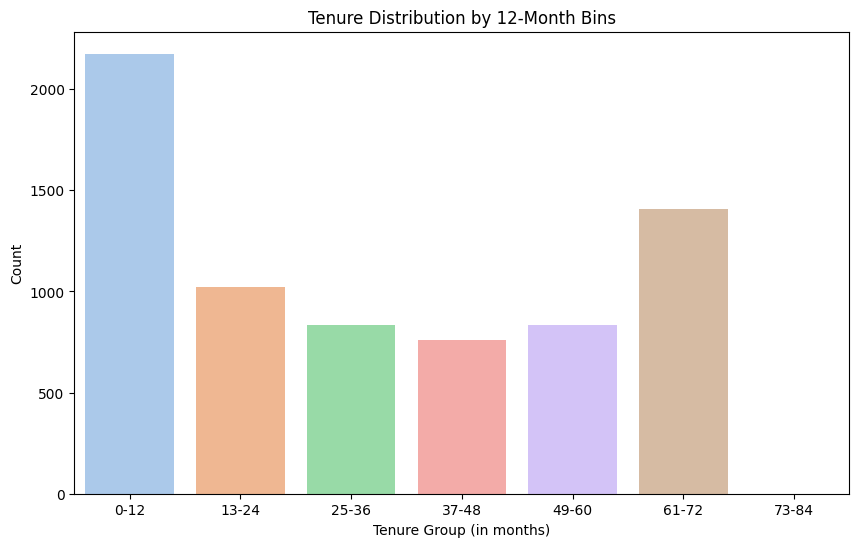

In [22]:
# Create bins of 12 months for 'tenure'
tenure_bins = [0, 12, 24, 36, 48, 60, 72, 84]  # Define bin edges (adjust as needed)
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84']  # Label each bin

# Use pd.cut to create a new column 'TenureGroup' with the bin labels
df['TenureGroup'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

# Create a count plot for 'TenureGroup'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TenureGroup', palette='pastel')
plt.title('Tenure Distribution by 12-Month Bins')
plt.xlabel('Tenure Group (in months)')
plt.ylabel('Count')

# Show the plot
plt.show()

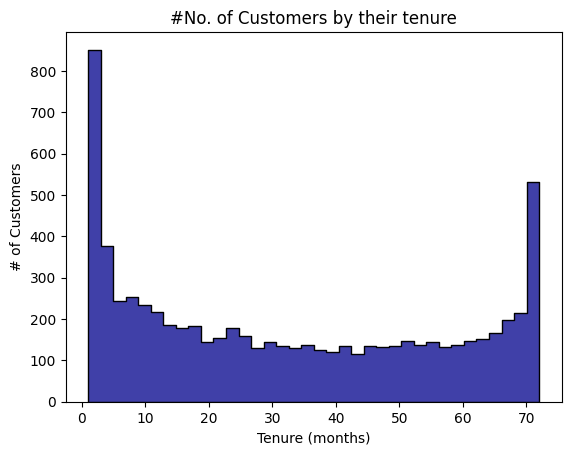

In [23]:
# Create a histogram for 'tenure'
sns.histplot(df['tenure'], bins=int(180/5), color='darkblue', element='step', edgecolor='black')

# Customize the plot labels and title
plt.ylabel('# of Customers')
plt.xlabel('Tenure (months)')
plt.title('#No. of Customers by their tenure')

# Show the plot
plt.show()

The analysis of customer tenure reveals that a significant number of customers have a very short tenure of just one month, while a notable portion of the customer base has remained with the telecom company for the maximum tenure of approximately 72 months.

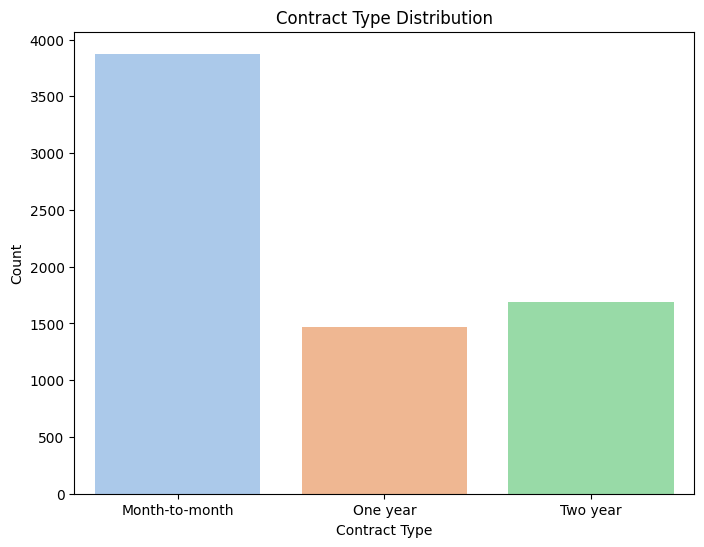

In [24]:
# Create a count plot for 'Contract' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', palette='pastel')
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Show the plot
plt.show()

from the above graph we can say most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

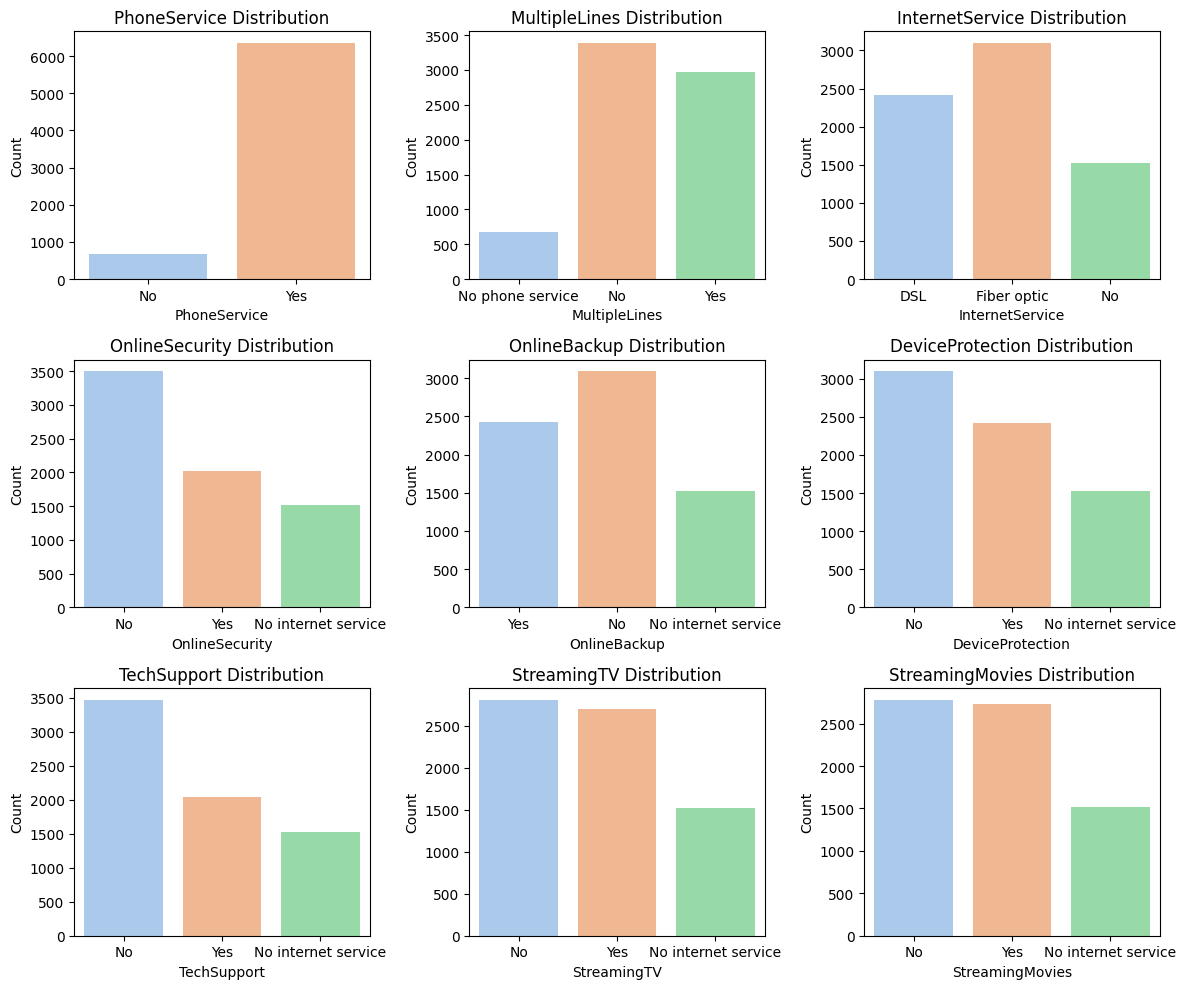

In [25]:
# Define the columns related to services
service_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create separate count plots for each service
plt.figure(figsize=(12, 10))

for i, service in enumerate(service_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=service, palette='pastel')
    plt.title(f'{service} Distribution')
    plt.xlabel(service)
    plt.ylabel('Count')

plt.tight_layout()
# Show the plots
plt.show()

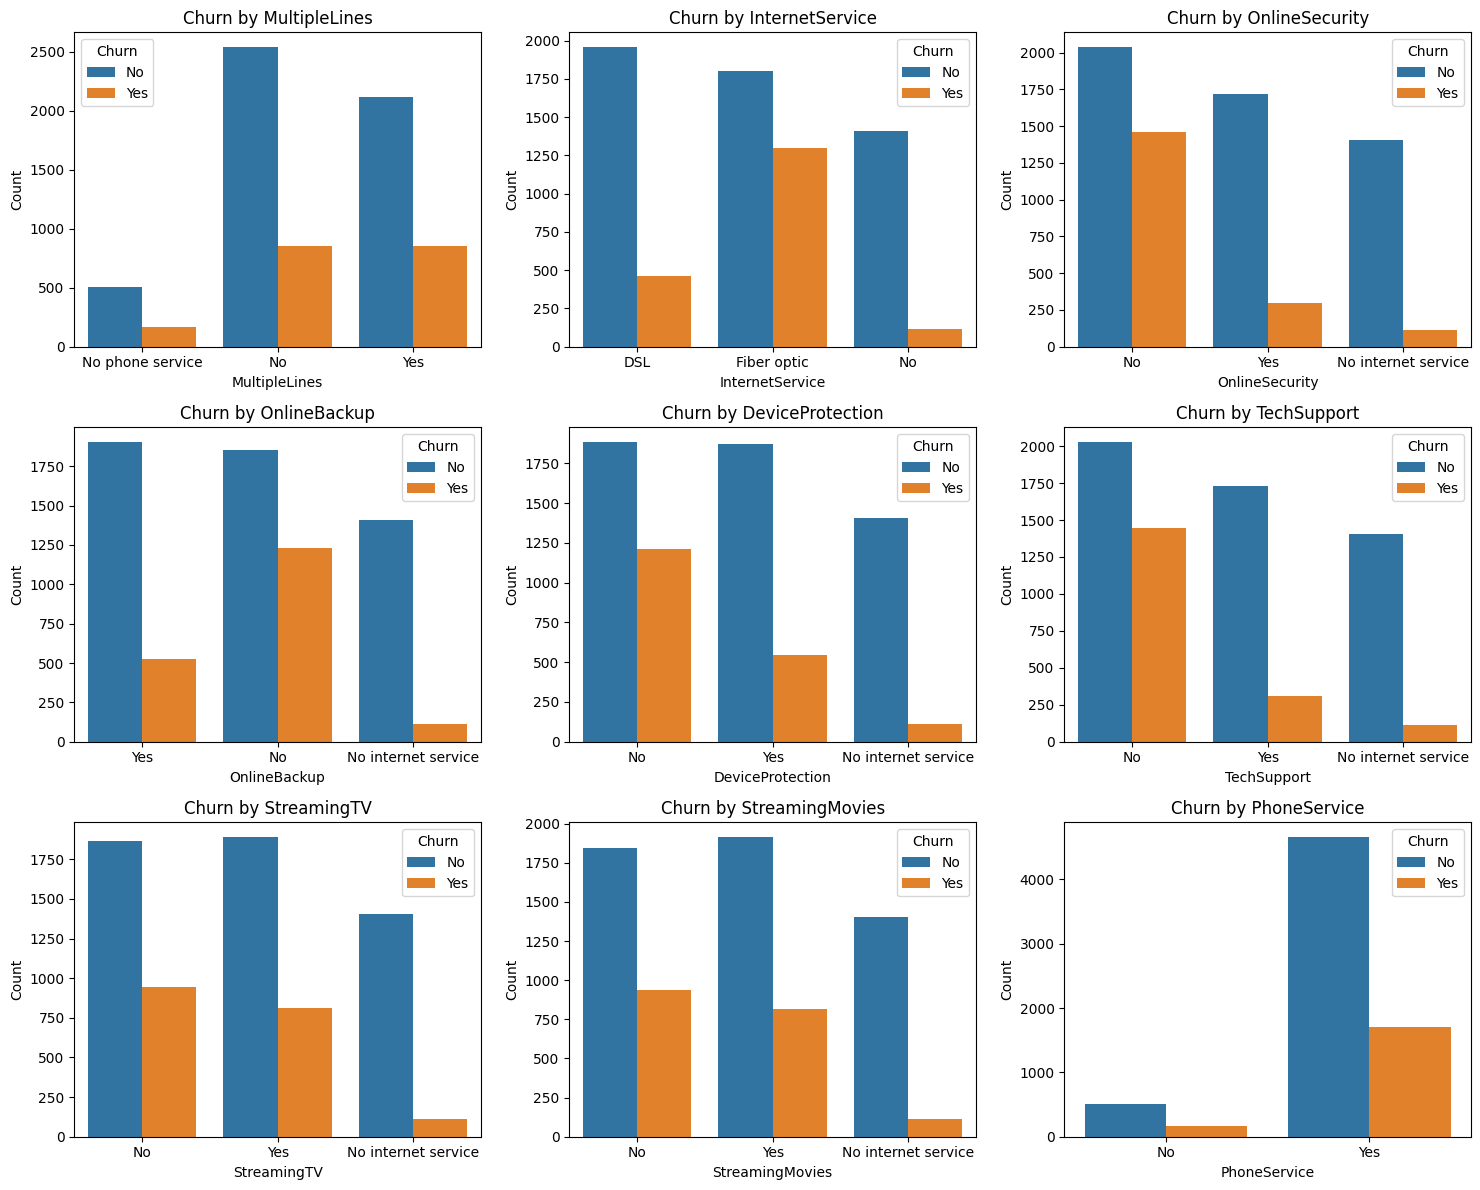

In [26]:
# Define a list of features
features = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PhoneService"]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Iterate through the features and create countplots for churn
for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[row, col])
    axes[row, col].set_title(f'Churn by {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

No MultipleLines, DSL InternetService, No Online security, Online Backup-Yes,DeviceProtection-Yes, StreamingTv-Yes, StreamingMovies-Yes, No Tech Support and PhoneServies-Yes show are high churners

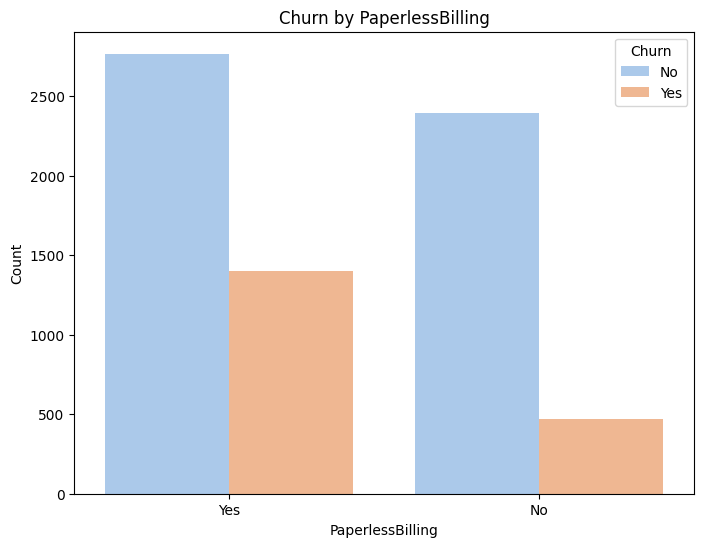

In [27]:
# Create a bar chart for 'Churn' by 'PaperlessBilling' status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='pastel')
plt.title('Churn by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.show()

paperlessbilling customers show high churn.

In [28]:
#TenureGroup was create to get the insights wrt to months, it wont be used further
df = df.drop(['TenureGroup'], axis = 1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


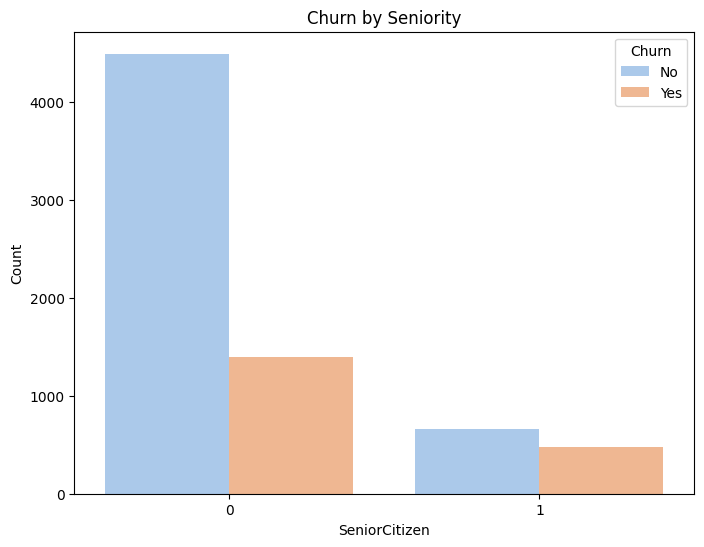

In [29]:
# Create a bar chart for 'Churn' by 'SeniorCitizen' status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='pastel')
plt.title('Churn by Seniority')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

young customers have less churn rate compared to senior

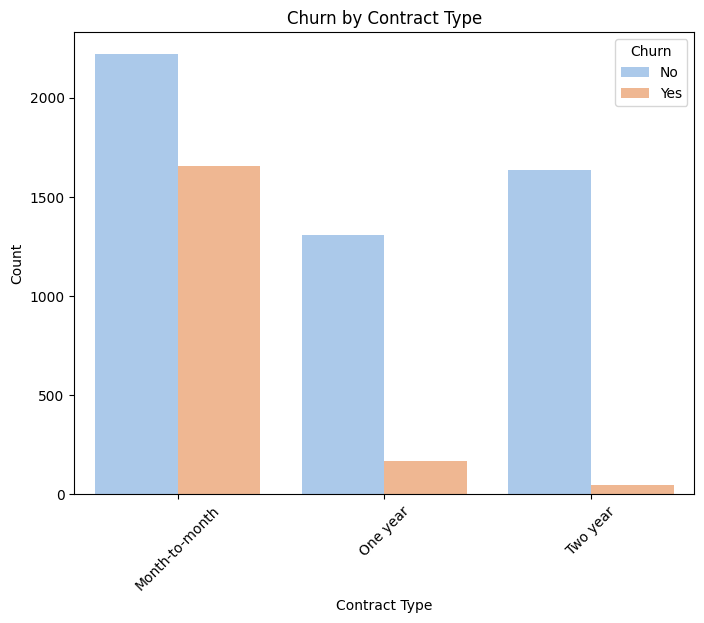

In [30]:
# Create a bar chart for 'Churn' by 'Contract' type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

The analysis reveals that customers with a month-to-month contract exhibit a notably high churn rate.

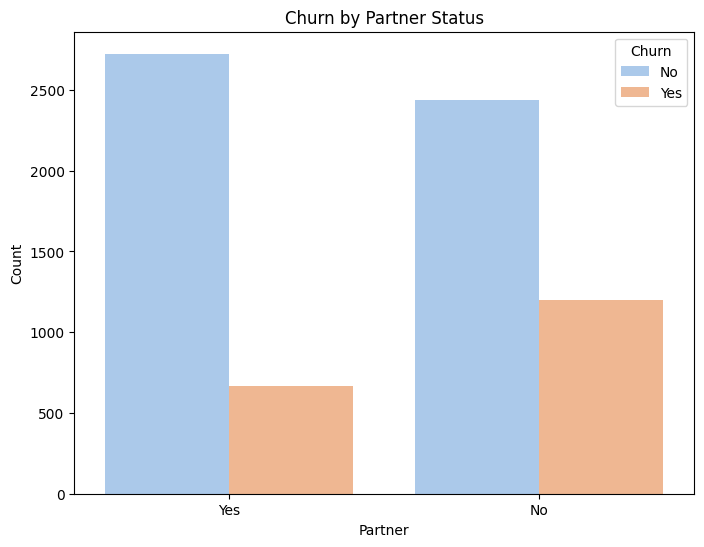

In [31]:
# Create a bar chart for 'Churn' by 'Partner' status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Partner', hue='Churn', palette='pastel')
plt.title('Churn by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')

plt.show()

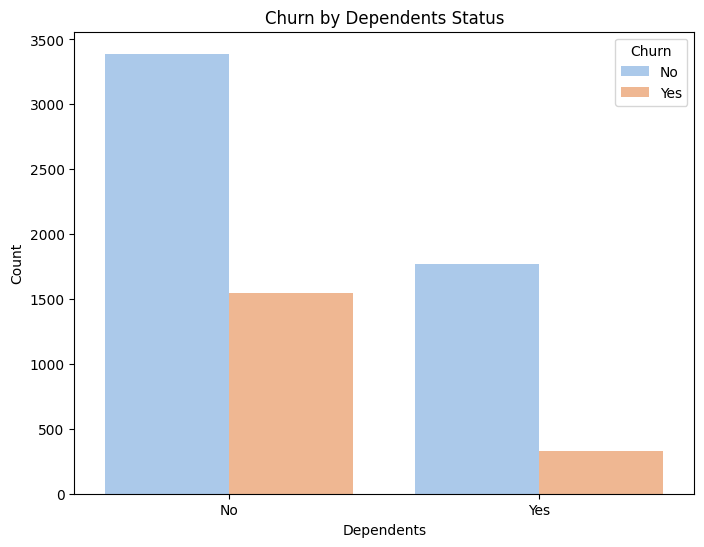

In [32]:
# Create a bar chart for 'Churn' by 'Dependents' status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='pastel')
plt.title('Churn by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

customers with no dependents have high churn rate.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

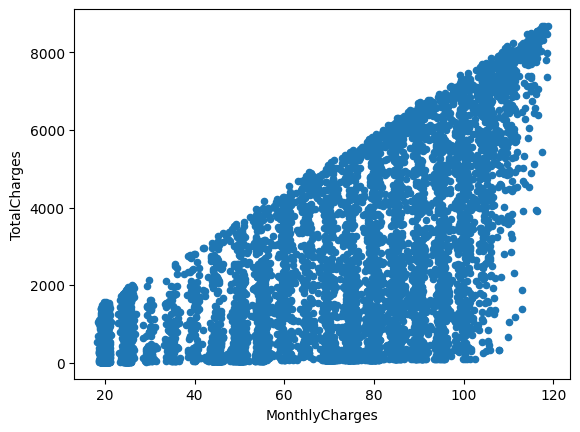

In [33]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

Total charges increases as monthly charges increases

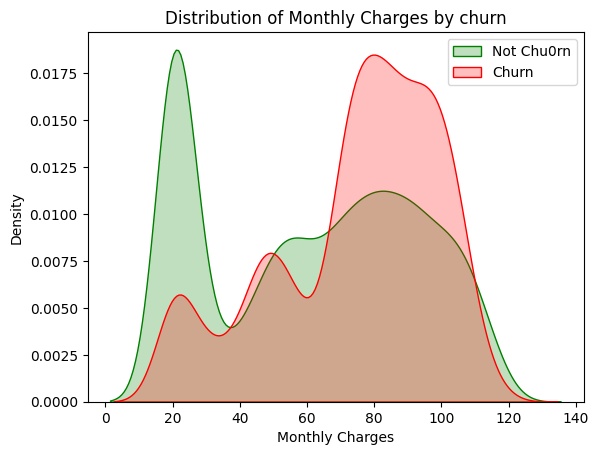

In [34]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], color="green", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], ax =ax, color="red", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Monthly Charges by churn');

Churn rates tend to increase as monthly charges rise

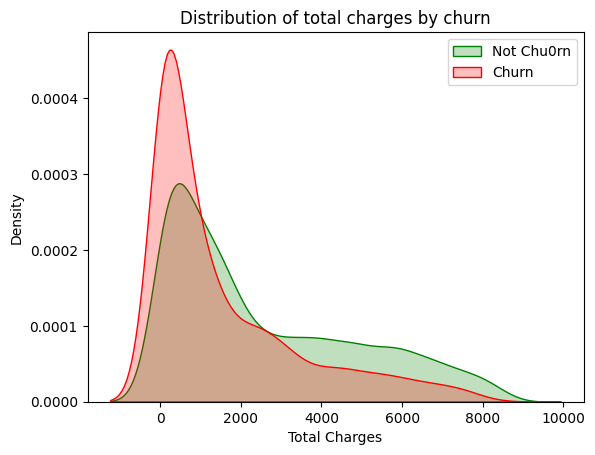

In [35]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ], color="green", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ], ax =ax, color="red", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

There is a higher churn rate among customers who have lower total charges

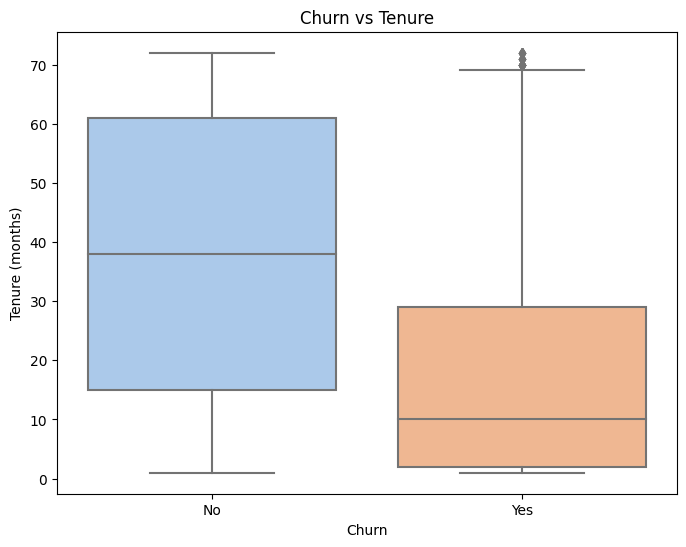

In [36]:
# Create a box plot for 'Churn' vs 'Tenure'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette='pastel')
plt.title('Churn vs Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')

# Show the plot
plt.show()

New customers are more likely to churn

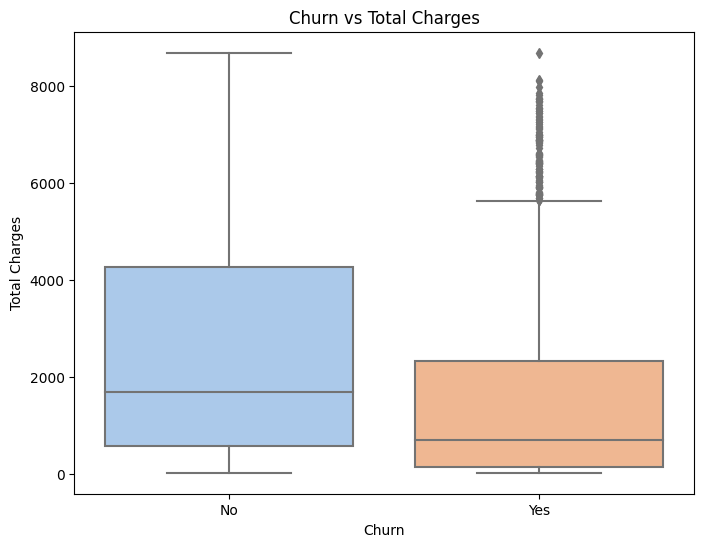

In [37]:
# Create a box plot for 'Churn' vs 'Monthly Charges'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='pastel')
plt.title('Churn vs Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')

# Show the plot
plt.show()

In [38]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

each value in df_num is checked against the lower bound (Q1 - 1.5 * IQR) and the upper bound (Q3 + 1.5 * IQR) for each numerical feature. If any value in a feature is outside this range, it returns True, indicating the presence of potential outliers.  No outliers were detected in the numerical features using the IQR method, so no adjustments to the data were necessary.

In [39]:
#Removing customerID column, which will notbe required for processing
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Label encoding to convert categorical variables into numerical form

In [40]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<Axes: >

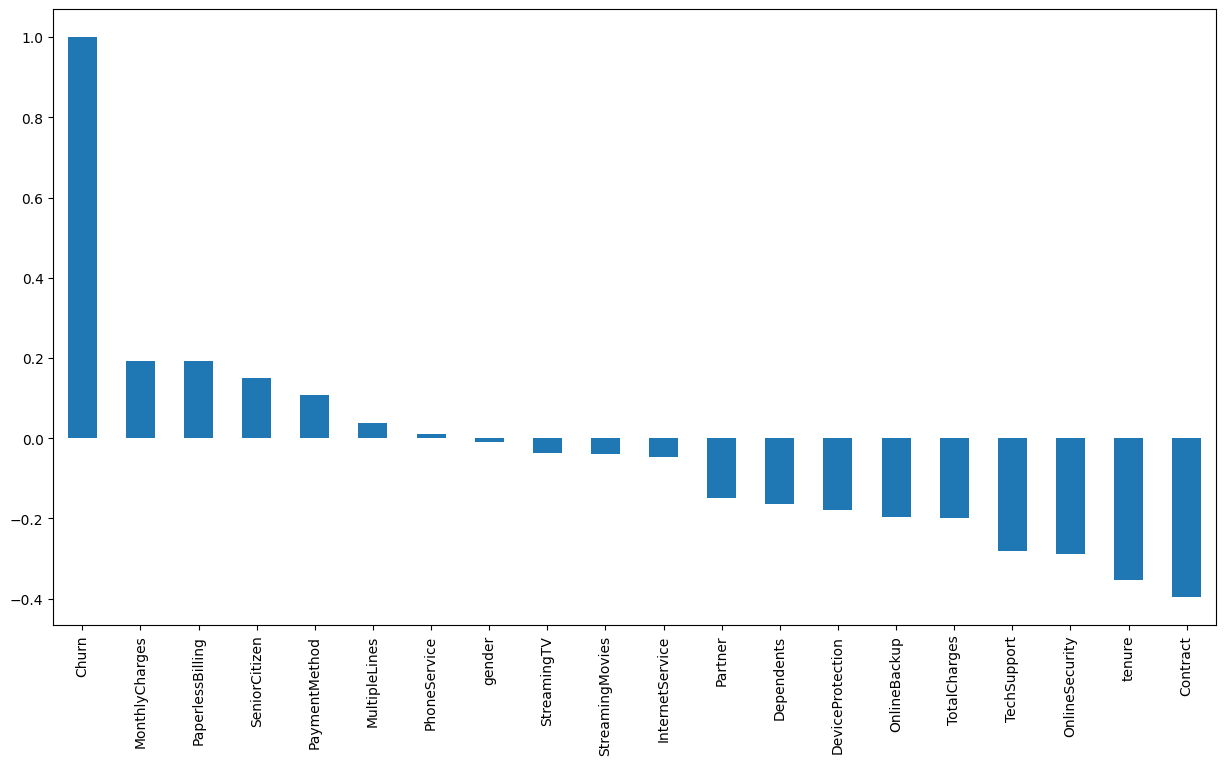

In [42]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Monthly Charges,paperless billing, senior citizen payment method seem to be positively correlated with churn. While, tenure,contract,online security, total charges  seem to be negatively correlated with churn

# Hypothesis Testing

Hypothesis(1): Phone Service Impact Churn
*   Null Hypothesis (H0): Phone service type does not significantly impact customer churn.
*   Alternate hypothesis (H1):Phone service type significantly impacts customer churn.

Hypothesis(2): Seniority Affects Churn
*   Null Hypothesis (H0):Seniority does not have a significant impact on churn
*   Alternate hypothesis (H1): Seniority has a significant impact on churn.

In [43]:
from scipy import stats
from scipy.stats import chi2_contingency

In [44]:
# Create a contingency table for PhoneService and Churn
contingency_table = pd.crosstab(df['PhoneService'], df['Churn'])

# Perform the chi-squared test for independence
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Print the chi-squared test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Check if the result is statistically significant
if p < alpha:
    print("The null hypothesis (H0) is rejected. Phone services have a significant impact on churn.")
else:
    print("The null hypothesis (H0) is accepted. Phone services do not have a significant impact on churn.")

Chi-squared statistic: 0.8737327674431736
P-value: 0.34992398942431924
The null hypothesis (H0) is accepted. Phone services do not have a significant impact on churn.


The p-value is greater than 0.05, indicating that there is no strong evidence to reject the null hypothesis (H0). The null hypothesis typically states that the two variables are independent or have no significant association. Therefore, based on the results of the chi-squared test, it appears that "Phone Services" and "Churn" are not significantly associated, and "Phone Services" may not have a significant impact on customer churn

In [45]:
# Create a contingency table for SeniorCitizen and Churn
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Perform the chi-squared test for independence
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Print the chi-squared test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Check if the result is statistically significant
if p < alpha:
    print("The null hypothesis (H0) is rejected. Seniority (being a senior citizen) has a significant impact on churn.")
else:
    print("The null hypothesis (H0) is accepted. Seniority does not have a significant impact on churn.")

Chi-squared statistic: 158.4408162893713
P-value: 2.4792557203954705e-36
The null hypothesis (H0) is rejected. Seniority (being a senior citizen) has a significant impact on churn.


Based on the chi-squared test results, it appears that the "Seniority" (being a senior citizen) feature has a significant impact on customer churn. The p-value is extremely small (2.479e-36), which indicates a very low probability of observing such results if there were no relationship between "Seniority" and churn.

# Data Preprocessing

target variable is Churn

In [46]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=40, stratify=y_resampled)

In [49]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

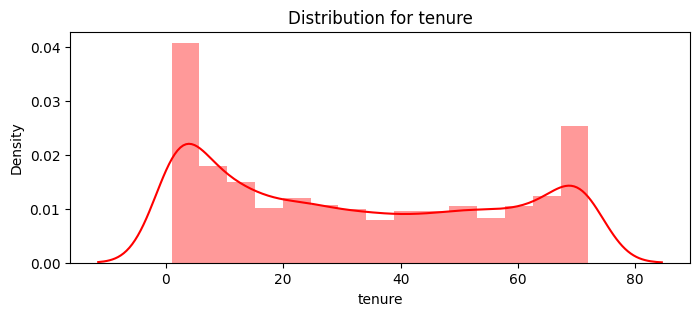

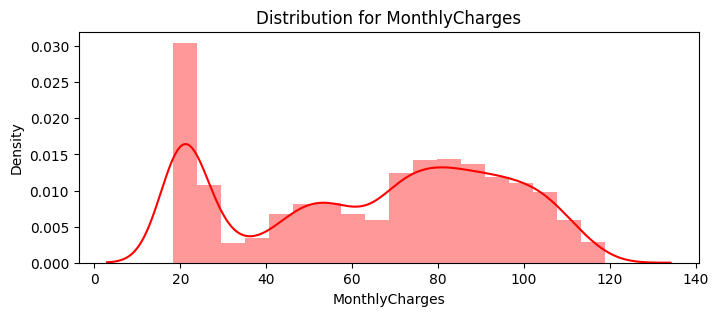

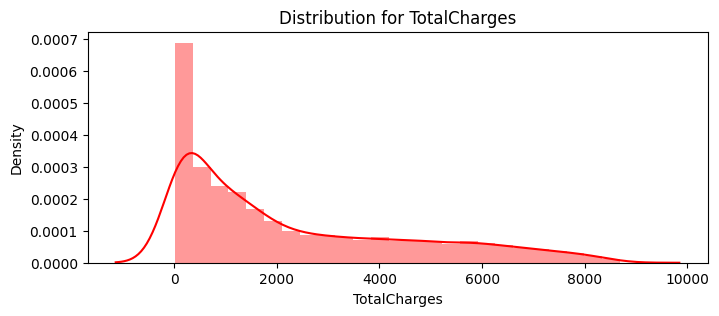

In [50]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Given the variability in the value ranges of numerical features, I will employ standard scaling to normalize them, ensuring that all features are on a consistent and comparable scale.

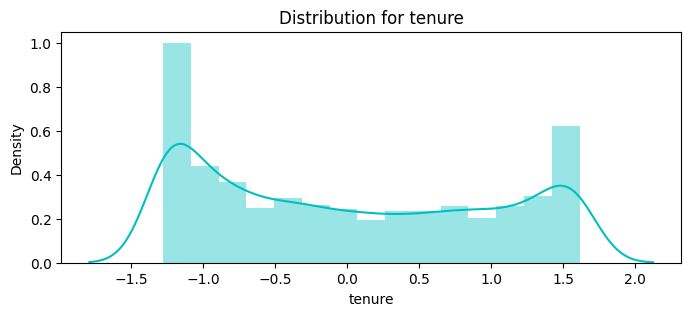

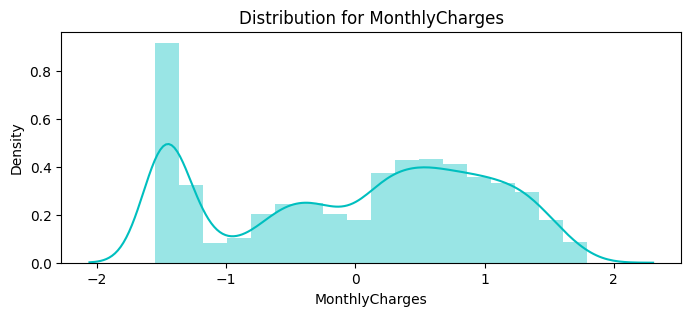

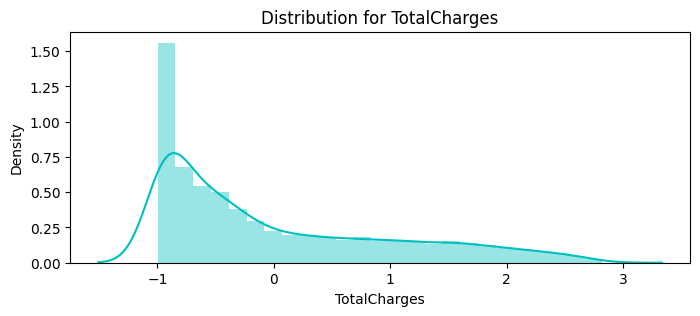

In [51]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [52]:
scaler= StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Machine Learning Model and Evaluations

The target variable is "Churn," a categorical variable, therefore, classification models are employed. The models utilized in this analysis comprise:
Logistic Regression,Random Forest,Decision Tree, and Support Vector Machine

The evaluation of models will be based on the classification report and ROC curve. Finally, hyperparameter tuning and model improvement will be performed for the model that demonstrates superior performance among the four models.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score, roc_curve, auc,roc_auc_score
from tabulate import tabulate

**LogisticRegression**

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train) #Train a logistic regression model on the training data:


LogisticRegression()

In [55]:
lr_pred= lr_model.predict(X_test) #Use the trained model to make predictions on the test data

from sklearn.metrics import classification_report

print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1549
           1       0.78      0.85      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



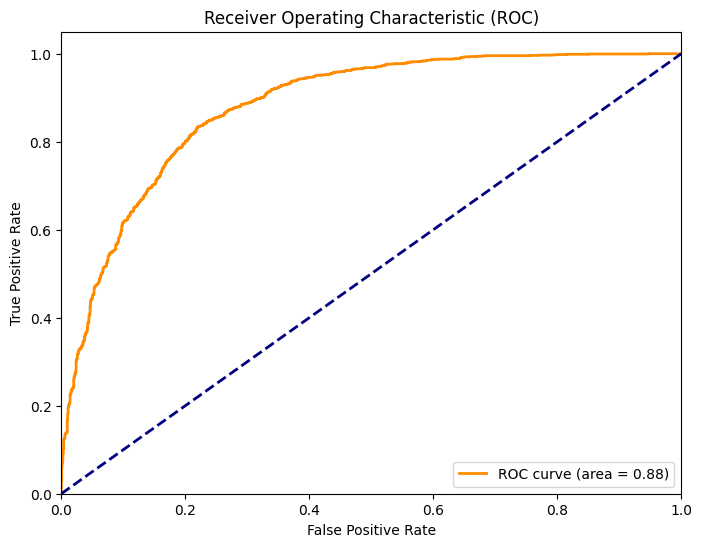

In [56]:


fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

**RandomForest**

In [57]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =40, max_features = "auto",
                                  max_leaf_nodes = 30)

model_rf.fit(X_train, y_train)

# Make predictions
rf_pred = model_rf.predict(X_test)


In [58]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1549
           1       0.80      0.84      0.82      1549

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



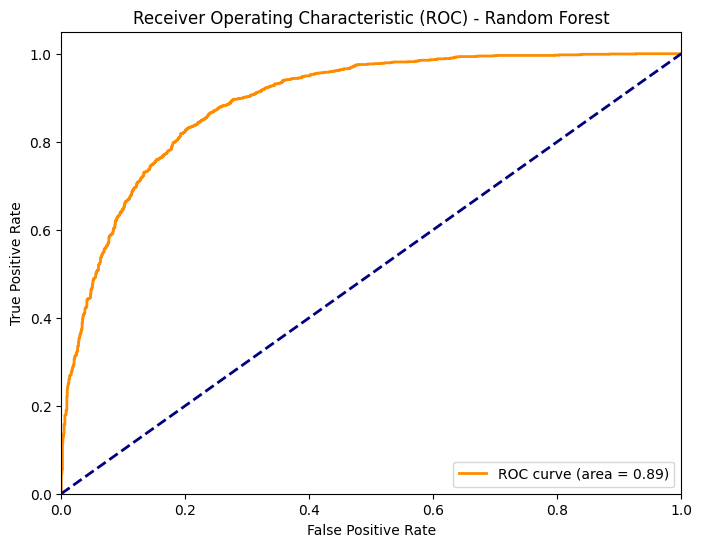

In [59]:
# Get the probability estimates for the positive class (class 1)
rf_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

**Decision Tree**

In [60]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)
#accuracy_dt = dt_model.score(X_test,y_test)


In [61]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1549
           1       0.78      0.77      0.77      1549

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



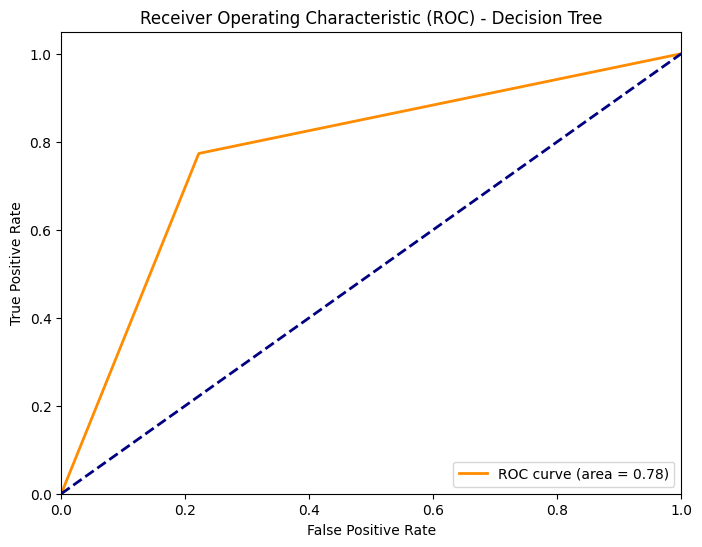

In [62]:
# Get the probability estimates for the positive class (class 1)
dt_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc='lower right')
plt.show()

In [63]:
# Create the Confusion matrix
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,predictdt_y))

**SVM**

In [64]:
svm_model = SVC(kernel='linear',probability=True)
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
#metrics.accuracy_score(y_test, preds)

In [65]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.79      1549
           1       0.77      0.85      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



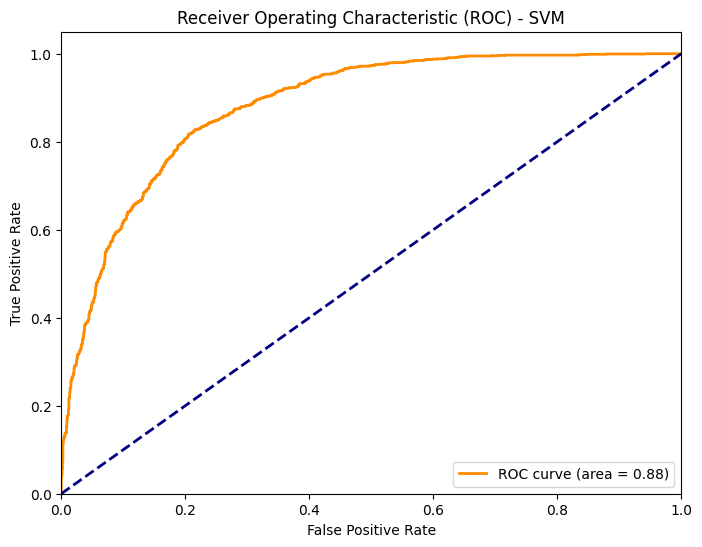

In [66]:
# Make predictions on the test data
svm_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc='lower right')
plt.show()

classification report of models

In [67]:

lr_report = classification_report(y_test, lr_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True)
dt_report = classification_report(y_test, dt_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)

# Calculate accuracy for each model
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Create a table to display classification reports and accuracy in the desired order
table = [["Model", "Accuracy", "Precision (0)", "Recall (0)", "F1-Score (0)", "Precision (1)", "Recall (1)", "F1-Score (1)"],
         ["Logistic Regression", lr_accuracy, lr_report["0"]["precision"], lr_report["0"]["recall"], lr_report["0"]["f1-score"], lr_report["1"]["precision"], lr_report["1"]["recall"], lr_report["1"]["f1-score"]],
         ["Random Forest", rf_accuracy, rf_report["0"]["precision"], rf_report["0"]["recall"], rf_report["0"]["f1-score"], rf_report["1"]["precision"], rf_report["1"]["recall"], rf_report["1"]["f1-score"]],
         ["Decision Tree", dt_accuracy, dt_report["0"]["precision"], dt_report["0"]["recall"], dt_report["0"]["f1-score"], dt_report["1"]["precision"], dt_report["1"]["recall"], dt_report["1"]["f1-score"]],
         ["SVM", svm_accuracy, svm_report["0"]["precision"], svm_report["0"]["recall"], svm_report["0"]["f1-score"], svm_report["1"]["precision"], svm_report["1"]["recall"], svm_report["1"]["f1-score"]]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="plain")) #tablefmt="fancy_grid

Model                  Accuracy    Precision (0)    Recall (0)    F1-Score (0)    Precision (1)    Recall (1)    F1-Score (1)
Logistic Regression    0.804713         0.834752      0.759845        0.795539         0.779621      0.84958         0.813099
Random Forest          0.811168         0.827446      0.786314        0.806356         0.796433      0.836023        0.815748
Decision Tree          0.775339         0.773573      0.778567        0.776062         0.777128      0.772111        0.774611
SVM                    0.797611         0.834058      0.74306         0.785934         0.768335      0.852163        0.808081


In [68]:
# Calculate ROC AUC scores for each model
lr_prob = lr_model.predict_proba(X_test)[:, 1]
rf_prob = model_rf.predict_proba(X_test)[:, 1]
dt_prob = dt_model.predict_proba(X_test)[:, 1]
svm_prob = svm_model.predict_proba(X_test)[:, 1]

roc_scores = {
    "Logistic Regression": roc_auc_score(y_test, lr_prob),
    "Random Forest": roc_auc_score(y_test, rf_prob),
    "Decision Tree": roc_auc_score(y_test, dt_prob),
    "Support Vector Machine": roc_auc_score(y_test, svm_prob)
}

# Create a DataFrame to display ROC scores
roc_df = pd.DataFrame(roc_scores.items(), columns=["Model", "ROC Score"])
roc_df["ROC Score"] = roc_df["ROC Score"].round(2)

# Display the ROC table
print(roc_df)

                    Model  ROC Score
0     Logistic Regression       0.88
1           Random Forest       0.89
2           Decision Tree       0.78
3  Support Vector Machine       0.88


Based on the classification reports it appears that the Random Forest model performs slightly better than the Logistic Regression model in terms of accuracy and F1-scores for both the "0" and "1" classes. ROC Score is same for both.
The Random Forest model seems to be the better choice for predicting customer churn in this dataset

**Hyperparameter Tuning for Random Forest using GridSearchCV**

In [69]:
# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Create the GridSearchCV object s
rf_grid_search = GridSearchCV(
    rf_model, param_grid_rf, cv=3, verbose=0, n_jobs=-1
)

# Fit the GridSearchCV to the training data
rf_grid_search.fit(X_train, y_train)

# Make predictions with the best-tuned model on the test set
y_pred_rf_tuned = rf_grid_search.predict(X_test)

# Get the best hyperparameters
best_params_rf = rf_grid_search.best_params_
print('Random Forest - Best Parameters:', best_params_rf)


Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [74]:
# Create a Random Forest classifier with the best-tuned hyperparameters
best_rf_model = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100
)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)




Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1549
           1       0.82      0.85      0.84      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



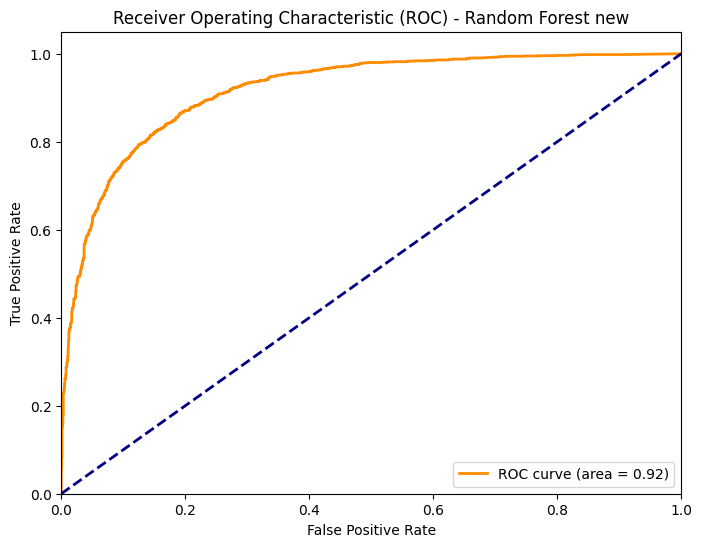

In [75]:
# Get the probability estimates for the positive class (class 1)
rf_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest new')
plt.legend(loc='lower right')
plt.show()

In [76]:
rfnew_report = classification_report(y_test, y_pred_rf,output_dict=True)
rfnew_accuracy = accuracy_score(y_test, y_pred_rf)

# Create a table to display classification reports and accuracy in the desired order
table = [["Model", "Accuracy", "Precision (0)", "Recall (0)", "F1-Score (0)", "Precision (1)", "Recall (1)", "F1-Score (1)"],
         ["Random Forest old", rf_accuracy, rf_report["0"]["precision"], rf_report["0"]["recall"], rf_report["0"]["f1-score"], rf_report["1"]["precision"], rf_report["1"]["recall"], rf_report["1"]["f1-score"]],
         ["Random Forest new", rfnew_accuracy, rfnew_report["0"]["precision"], rfnew_report["0"]["recall"], rfnew_report["0"]["f1-score"], rfnew_report["1"]["precision"], rfnew_report["1"]["recall"], rfnew_report["1"]["f1-score"]],
        ]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="plain"))







Model                Accuracy    Precision (0)    Recall (0)    F1-Score (0)    Precision (1)    Recall (1)    F1-Score (1)
Random Forest old    0.811168         0.827446      0.786314        0.806356         0.796433      0.836023        0.815748
Random Forest new    0.833118         0.841722      0.820529        0.830991         0.824937      0.845707        0.835193


In [73]:
# Calculate ROC AUC scores for Random Forest
rf_prob = model_rf.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

roc_scores = {
    "Random Forest old": roc_auc_score(y_test, rf_prob),
    "Random Forest new": roc_auc_score(y_test, y_prob_rf)
}

# Create a DataFrame to display ROC scores
roc_df = pd.DataFrame(roc_scores.items(), columns=["Model", "ROC Score"])
roc_df["ROC Score"] = roc_df["ROC Score"].round(2)

# Display the ROC table
print(roc_df)

               Model  ROC Score
0  Random Forest old       0.89
1  Random Forest new       0.91



After hyperparameter tuning, the Random Forest model has shown significant improvement in both accuracy and its ability to correctly classify both churn (1) and non-churn (0) cases, and and ROC score. Therefore, the Random Forest model after hyperparameter tuning is the recommended choice for this dataset




# Conclusion

Fiber Optic Internet Services, No Online security, No Device Protection, No Online backup, No Tech Support,Contact Type of month to month and No papperless billing, high Monthly Charges, High total charges and low tenure show significant impact on churn . Random Forest model after hyperparameter tuning is the recommended choice for this dataset.
